In [1]:
import os
drive_path = '/media/stephen/Brain20191/allen-brain-observatory/visual-coding-2p/'
if not os.path.isdir(drive_path):
    drive_path = '/media/alihamodi/Brain2019/allen-brain-observatory/visual-coding-2p/'

import warnings; warnings.simplefilter('ignore');
from utils.polarplot import *
from utils.polardata import *
from utils.data_wrappers import *
import os
import pandas as pd
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
import allensdk.brain_observatory.stimulus_info as stim_info
manifest_file = os.path.join(drive_path,'manifest.json')
boc = BrainObservatoryCache(manifest_file=manifest_file)

import warnings;
warnings.simplefilter('ignore');
cells = boc.get_cell_specimens()
cells = pd.DataFrame.from_records(cells)

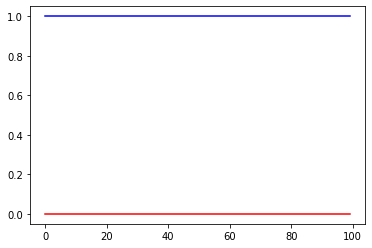

In [2]:
ts1 = np.zeros(100)
ts2 = np.ones(100)

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(ts1, color='red')
ax.plot(ts2, color='blue')

# Signal correlation

In [3]:
eid = 501836392
c1 = 517420102
c2 = 517421141
use_events = True
corr_type = 'TEMP_CORR_AVG'

In [8]:
data_set = boc.get_ophys_experiment_data(eid)
events = boc.get_ophys_experiment_events(ophys_experiment_id=eid)
loc_x, loc_y = get_cell_locations(data_set)
d = get_cell_distance(data_set, loc_x, loc_y, c1, c2)
cidxs = data_set.get_cell_specimen_indices([c1, c2])
stim_table = data_set.get_stimulus_table('natural_movie_one') 

Distance = 40.1280113209426. Correlation = 0.23535621108831592


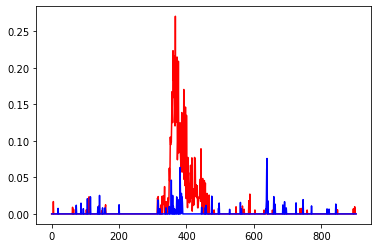

In [9]:
# Plot the events
cidx1 = cidxs[0]
cidx2 = cidxs[1]
events1 = events[cidx1,:]
events2 = events[cidx2,:]

totalts1, totalts2 = get_avg_tses(stim_table, events1, events2)
corr, p_value = pearsonr(totalts1, totalts2)
print ("Distance = {}. Correlation = {}".format(d, corr))

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(totalts1, color='red')
ax.plot(totalts2, color='blue')

In [15]:
pair_corr

0.23535621108831592